<a href="https://colab.research.google.com/github/arfandiTelU/Skripsi/blob/master/Cnn_Klasifikasi_Bibit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghubungkan Dengan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Install Library

In [5]:
!pip install -q keras
!pip install opencv-contrib-python

Import Library

In [0]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def transform(pos):
# This function is used to find the corners of the object and the dimensions of the object
    pts=[]
    n=len(pos)
    for i in range(n):
        pts.append(list(pos[i][0]))
       
    sums={}
    diffs={}
    tl=tr=bl=br=0
    for i in pts:
        x=i[0]
        y=i[1]
        sum=x+y
        diff=y-x
        sums[sum]=i
        diffs[diff]=i
    sums=sorted(sums.items())
    diffs=sorted(diffs.items())
    n=len(sums)
    rect=[sums[0][1],diffs[0][1],diffs[n-1][1],sums[n-1][1]]
    #      top-left   top-right   bottom-left   bottom-right
   
    h1=np.sqrt((rect[0][0]-rect[2][0])**2 + (rect[0][1]-rect[2][1])**2)     #height of left side
    h2=np.sqrt((rect[1][0]-rect[3][0])**2 + (rect[1][1]-rect[3][1])**2)     #height of right side
    h=max(h1,h2)
   
    w1=np.sqrt((rect[0][0]-rect[1][0])**2 + (rect[0][1]-rect[1][1])**2)     #width of upper side
    w2=np.sqrt((rect[2][0]-rect[3][0])**2 + (rect[2][1]-rect[3][1])**2)     #width of lower side
    w=max(w1,w2)
   
    return int(w),int(h),rect

[[[2316 2399]]

 [[2242 2544]]

 [[2130 2596]]

 [[2052 2562]]

 [[1989 2440]]

 [[1921 2420]]

 [[1988 2440]]

 [[2053 2564]]

 [[2130 2596]]

 [[2242 2545]]]


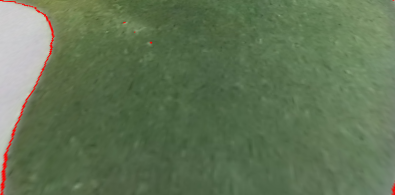

In [81]:
path = '/content/gdrive/My Drive/Dataset/cabai hari ke 10'

# datagen = 

#reading image
image = cv2.imread("/content/gdrive/My Drive/Dataset/pakcoy hari ke 5/20191231_132829.jpg")
# print(image)
# cv2_imshow(image)

greyImage = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
greyImage =  cv2.GaussianBlur(greyImage, (5,5), 0)
#converting to gray scale
# gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# cv2_imshow(greyImage)
#applying canny edge detection
# edged = cv2.Canny(image, 50, 55)
# # cv2_imshow(edged.copy())
# plt.subplot(121),plt.imshow(gray,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edged,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


# laplacian = cv2.Laplacian(gray,cv2.CV_64F)
# sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
# sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

# plt.subplot(2,2,1),plt.imshow(gray,cmap = 'gray')
# plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
# plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
# plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
# plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# plt.show()

newImage = image.copy()
       
edge = cv2.Canny(greyImage, 100,100)
contours,_ = cv2.findContours(edge.copy(),1,1)
# contours = contours
maxArea = 0
maxPeri = 0
maxCountour = 0

for i in contours : 
    peri = cv2.arcLength(i, True)
    if peri > maxPeri:
        maxPeri = peri
        maxCountour = i

newImage = cv2.drawContours(image, contours,-1,(0,0,255), 1)
# maxCountour = maxCountour
# print(contours)

contour = maxCountour
peri=cv2.arcLength(contour,True)
approx=cv2.approxPolyDP(contour,0.02*peri,True)
print(approx)
w,h,arr = transform(approx)
pts2=np.float32([[0,0],[w,0],[0,h],[w,h]])
pts1=np.float32(arr)
M=cv2.getPerspectiveTransform(pts1,pts2)
newImage=cv2.warpPerspective(image, M,(w,h))
image = newImage
cv2_imshow(image)

# https://medium.com/@ego1403/image-processing-menggunakan-python-dan-open-cv-part-1-cropping-gambar-berdasarkan-canny-edge-f33c86255d2a